In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier


In [2]:
dataset = pd.read_csv(r"C:\Users\user\OneDrive\Documents\Learn AI\ML_Projects\sentiment_analysis\dataset\sentiment_data_1.csv")


In [3]:
dataset.shape

(269003, 3)

In [4]:
dataset['Sentiment'].value_counts()

Sentiment
2    103059
1     82972
0     82972
Name: count, dtype: int64

0 --> Negative

1 --> Neutral

2 --> Positive

Remove Unnecessary Column

In [5]:
dataset.drop(columns=['Unnamed: 0'], inplace=True, errors='ignore')

In [6]:
dataset.head()

,Comment,Sentiment
0,lets forget apple pay required brand new iphon...,1
1,nz retailers don’t even contactless credit car...,0
2,forever acknowledge channel help lessons ideas...,2
3,whenever go place doesn’t take apple pay doesn...,0
4,apple pay convenient secure easy use used kore...,2


***Data Preprocessing***





1.  Handle Missing Values  



In [7]:
dataset.isnull().sum()

Comment      217
Sentiment      0
dtype: int64

In [8]:
dataset.dropna(subset = ['Comment'], inplace=True)

In [9]:
dataset.isnull().sum()

Comment      0
Sentiment    0
dtype: int64



2.   Remove Punctuation, Numbers & Special Characters



In [10]:
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

dataset['Comment'] = dataset['Comment'].apply(clean_text)

3.   Remove StopWords



In [11]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

dataset['Comment'] = dataset['Comment'].apply(
    lambda x: ' '.join(word for word in x.split() if word not in stop_words))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


4. Stemming

In [12]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

def stem_text(text):
    return ' '.join(stemmer.stem(word) for word in text.split())

dataset['Comment'] = dataset['Comment'].apply(stem_text)




5. Feature Extraction   


In [13]:
x = dataset['Comment']
y = dataset['Sentiment']

In [14]:
vectorizer = TfidfVectorizer()
x_tfidf = vectorizer.fit_transform(x)

In [15]:
print(x_tfidf)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 2989987 stored elements and shape (268786, 122392)>
  Coords	Values
  (0, 60888)	0.11004977196881055
  (0, 38094)	0.13567023287926788
  (0, 5677)	0.32628800509010686
  (0, 80909)	0.13051674295634028
  (0, 90989)	0.1484919888854734
  (0, 14577)	0.16103374600179624
  (0, 74305)	0.10326987714556084
  (0, 52045)	0.49911852742579016
  (0, 78107)	0.14007903798735635
  (0, 114160)	0.2743191753844281
  (0, 98936)	0.17608470042884652
  (0, 84387)	0.21108076961901
  (0, 114195)	0.16081759352665356
  (0, 9827)	0.14199855330715958
  (0, 117271)	0.14907409972384364
  (0, 586)	0.130832211762003
  (0, 34251)	0.09519462546291803
  (0, 117050)	0.09093512303882659
  (0, 103850)	0.11623261264156183
  (0, 50003)	0.21223774938806386
  (0, 106496)	0.29656291354072495
  (0, 77179)	0.18560049367097944
  (0, 90820)	0.15946343927893145
  (0, 76293)	0.13969491869976308
  (0, 81354)	0.08378164935334352
  :	:
  (268778, 86019)	0.515892639743183
  (26877

In [16]:
X = x_tfidf
Y = dataset['Sentiment']

In [17]:
print(X)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 2989987 stored elements and shape (268786, 122392)>
  Coords	Values
  (0, 60888)	0.11004977196881055
  (0, 38094)	0.13567023287926788
  (0, 5677)	0.32628800509010686
  (0, 80909)	0.13051674295634028
  (0, 90989)	0.1484919888854734
  (0, 14577)	0.16103374600179624
  (0, 74305)	0.10326987714556084
  (0, 52045)	0.49911852742579016
  (0, 78107)	0.14007903798735635
  (0, 114160)	0.2743191753844281
  (0, 98936)	0.17608470042884652
  (0, 84387)	0.21108076961901
  (0, 114195)	0.16081759352665356
  (0, 9827)	0.14199855330715958
  (0, 117271)	0.14907409972384364
  (0, 586)	0.130832211762003
  (0, 34251)	0.09519462546291803
  (0, 117050)	0.09093512303882659
  (0, 103850)	0.11623261264156183
  (0, 50003)	0.21223774938806386
  (0, 106496)	0.29656291354072495
  (0, 77179)	0.18560049367097944
  (0, 90820)	0.15946343927893145
  (0, 76293)	0.13969491869976308
  (0, 81354)	0.08378164935334352
  :	:
  (268778, 86019)	0.515892639743183
  (26877

In [18]:
print(Y)

0         1
1         0
2         2
3         0
4         2
         ..
268998    0
268999    0
269000    0
269001    0
269002    0
Name: Sentiment, Length: 268786, dtype: int64


6. Handle Imbalance data


In [19]:
dataset['Sentiment'].value_counts()

Sentiment
2    103046
0     82963
1     82777
Name: count, dtype: int64

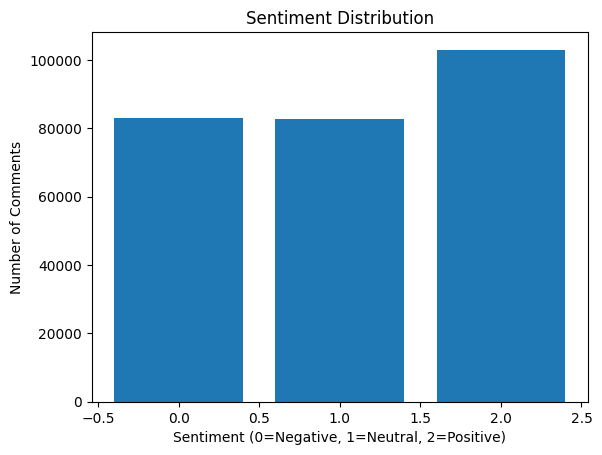

In [20]:
import matplotlib.pyplot as plt

sentiment_counts = dataset['Sentiment'].value_counts().sort_index()

plt.figure()
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel("Sentiment (0=Negative, 1=Neutral, 2=Positive)")
plt.ylabel("Number of Comments")
plt.title("Sentiment Distribution")
plt.show()


In [21]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_smote,y_smote = smote.fit_resample(X,Y)

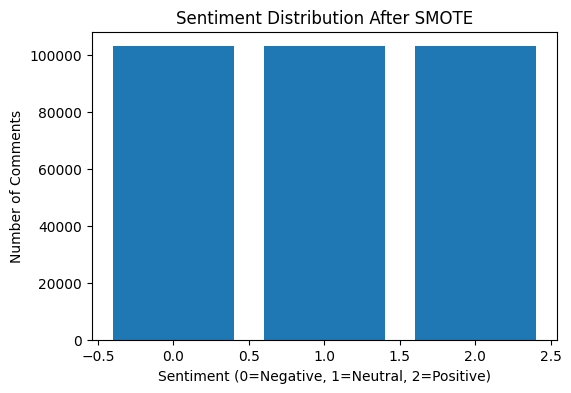

In [22]:
import matplotlib.pyplot as plt
import pandas as pd

sentiment_counts = pd.Series(y_smote).value_counts().sort_index()

plt.figure(figsize=(6,4))
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel("Sentiment (0=Negative, 1=Neutral, 2=Positive)")
plt.ylabel("Number of Comments")
plt.title("Sentiment Distribution After SMOTE")
plt.show()


Split Data

In [23]:
x_train, x_test, y_train, y_test = train_test_split(X_smote,y_smote, test_size=0.2, random_state=2)

Find Besst Model


In [24]:
def model_accuracy(model):

    model.fit(x_train, y_train)

    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred, average='weighted')
    train_recall = recall_score(y_train, y_train_pred, average='weighted')
    train_f1 = f1_score(y_train, y_train_pred, average='weighted')

    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred, average='weighted')
    test_recall = recall_score(y_test, y_test_pred, average='weighted')
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')

    print(" TRAIN METRICS ")
    print("Accuracy  :", train_accuracy)
    print("Precision :", train_precision)
    print("Recall    :", train_recall)
    print("F1 Score  :", train_f1)

    print("\n TEST METRICS ")
    print("Accuracy  :", test_accuracy)
    print("Precision :", test_precision)
    print("Recall    :", test_recall)
    print("F1 Score  :", test_f1)

  

In [25]:
model = LogisticRegression()
model_accuracy(model)

c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


 TRAIN METRICS 
Accuracy  : 0.8195301443532409
Precision : 0.8242270250094361
Recall    : 0.8195301443532409
F1 Score  : 0.8200970612792621

 TEST METRICS 
Accuracy  : 0.7861163227016885
Precision : 0.7915953664433664
Recall    : 0.7861163227016885
F1 Score  : 0.7867588823960605


In [26]:
model = DecisionTreeClassifier()
model_accuracy(model)

 TRAIN METRICS 
Accuracy  : 0.9984755974283288
Precision : 0.9984760344822438
Recall    : 0.9984755974283288
F1 Score  : 0.9984756706806895

 TEST METRICS 
Accuracy  : 0.8063822216471501
Precision : 0.8066496745842615
Recall    : 0.8063822216471501
F1 Score  : 0.8063042459932458


In [27]:
model = LinearSVC()
model_accuracy(model)

 TRAIN METRICS 
Accuracy  : 0.8822328251991428
Precision : 0.8839586296131169
Recall    : 0.8822328251991428
F1 Score  : 0.8824375326194285

 TEST METRICS 
Accuracy  : 0.7981982273403636
Precision : 0.8022655743801455
Recall    : 0.7981982273403636
F1 Score  : 0.798716285170055


In [28]:
model = LGBMClassifier()
model_accuracy(model)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 2.591095 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 393547
[LightGBM] [Info] Number of data points in the train set: 247310, number of used features: 7903
[LightGBM] [Info] Start training from score -1.097687
[LightGBM] [Info] Start training from score -1.098742
[LightGBM] [Info] Start training from score -1.099409


c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


 TRAIN METRICS 
Accuracy  : 0.7929036432008411
Precision : 0.8063162612164425
Recall    : 0.7929036432008411
F1 Score  : 0.7938679262586967

 TEST METRICS 
Accuracy  : 0.7854531927282138
Precision : 0.7982739926637997
Recall    : 0.7854531927282138
F1 Score  : 0.786167853444872


In [29]:
model = XGBClassifier()
model_accuracy(model)

 TRAIN METRICS 
Accuracy  : 0.790938498241074
Precision : 0.8133677391073357
Recall    : 0.790938498241074
F1 Score  : 0.7921259160776796

 TEST METRICS 
Accuracy  : 0.7746652002329042
Precision : 0.7955080101420551
Recall    : 0.7746652002329042
F1 Score  : 0.7753920210480997


Best one is LinearSVC

In [30]:
model = LinearSVC()
model.fit(x_train, y_train)

,"penalty penalty: {'l1', 'l2'}, default='l2'Specifies the norm used in the penalization. The 'l2'penalty is the standard used in SVC. The 'l1' leads to ``coef_``vectors that are sparse.",'l2'
,"loss loss: {'hinge', 'squared_hinge'}, default='squared_hinge'Specifies the loss function. 'hinge' is the standard SVM loss(used e.g. by the SVC class) while 'squared_hinge' is thesquare of the hinge loss. The combination of ``penalty='l1'``and ``loss='hinge'`` is not supported.",'squared_hinge'
,"dual dual: ""auto"" or bool, default=""auto""Select the algorithm to either solve the dual or primaloptimization problem. Prefer dual=False when n_samples > n_features.`dual=""auto""` will choose the value of the parameter automatically,based on the values of `n_samples`, `n_features`, `loss`, `multi_class`and `penalty`. If `n_samples` < `n_features` and optimizer supportschosen `loss`, `multi_class` and `penalty`, then dual will be set to True,otherwise it will be set to False... versionchanged:: 1.3 The `""auto""` option is added in version 1.3 and will be the default in version 1.5.",'auto'
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive.For an intuitive visualization of the effects of scalingthe regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"multi_class multi_class: {'ovr', 'crammer_singer'}, default='ovr'Determines the multi-class strategy if `y` contains more thantwo classes.``""ovr""`` trains n_classes one-vs-rest classifiers, while``""crammer_singer""`` optimizes a joint objective over all classes.While `crammer_singer` is interesting from a theoretical perspectiveas it is consistent, it is seldom used in practice as it rarely leadsto better accuracy and is more expensive to compute.If ``""crammer_singer""`` is chosen, the options loss, penalty and dualwill be ignored.",'ovr'
,"fit_intercept fit_intercept: bool, default=TrueWhether or not to fit an intercept. If set to True, the feature vectoris extended to include an intercept term: `[x_1, ..., x_n, 1]`, where1 corresponds to the intercept. If set to False, no intercept will beused in calculations (i.e. data is expected to be already centered).",True
,"intercept_scaling intercept_scaling: float, default=1.0When `fit_intercept` is True, the instance vector x becomes ``[x_1,..., x_n, intercept_scaling]``, i.e. a ""synthetic"" feature with aconstant value equal to `intercept_scaling` is appended to the instancevector. The intercept becomes intercept_scaling * synthetic featureweight. Note that liblinear internally penalizes the intercept,treating it like any other term in the feature vector. To reduce theimpact of the regularization on the intercept, the `intercept_scaling`parameter can be set to a value greater than 1; the higher the value of`intercept_scaling`, the lower the impact of regularization on it.Then, the weights become `[w_x_1, ..., w_x_n,w_intercept*intercept_scaling]`, where `w_x_1, ..., w_x_n` representthe feature weights and the intercept weight is scaled by`intercept_scaling`. This scaling allows the intercept term to have adifferent regularization behavior compared to the other features.",1
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to ``class_weight[i]*C`` forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: int, default=0Enable verbose output. Note that this setting takes advantage of aper-process runtime setting in liblinear that, if enabled, may not workproperly in a multithreaded context.",0
,"random_state random_state: int, RandomState instance or None, default=NoneControls the pseudo rand

In [31]:
'''import pickle

# Save the trained model
with open("sentiment_analyse.pkl", "wb") as file:  # wb = write binary
    pickle.dump(model, file)

# Save the vectorizer
with open("tfidf_vectorizer.pkl", "wb") as file:
    pickle.dump(vectorizer, file)'''

'import pickle\n\n# Save the trained model\nwith open("sentiment_analyse.pkl", "wb") as file:  # wb = write binary\n    pickle.dump(model, file)\n\n# Save the vectorizer\nwith open("tfidf_vectorizer.pkl", "wb") as file:\n    pickle.dump(vectorizer, file)'

In [47]:
input_data = input("Enter comment text: ")

input_data = clean_text(input_data)
input_data = ' '.join(word for word in input_data.split() if word not in stop_words)
input_data = stem_text(input_data)
input_vector = vectorizer.transform([input_data])
prediction = model.predict(input_vector)

sentiment_labels = {0: 'Negative', 1: 'Neutral', 2: 'Positive'}
result = sentiment_labels.get(prediction[0], "Unknown")

print(f"Prediction Value: {prediction[0]}")
print(f"The sentiment is: {result}")

Prediction Value: 0
The sentiment is: Negative
